In [13]:
# import stuff
import pandas as p
import numpy as n
#import seaborn as s
from matplotlib import pyplot as plt

## Data Set 2; Stock Exchange Data

This is the data set containing the stock market information for 14 unique exchanges over the span of 12-31-1965 to 06-03-2021.

There are 3 csv files, but for this project, we will only be using indexData.csv. This has all the null values and extra data that indexProcessed.csv does not. 

[csv link](https://www.kaggle.com/mattiuzc/stock-exchange-data)


### Useful Stats:
- Size of set ~> 112,457
- Columns ~> 8

In [3]:
stock = p.read_csv('data/indexData.csv', header = None, skipinitialspace = True,
                encoding = 'latin-1', low_memory = False, skiprows=1,
                names = ['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
)
p.set_option('display.max_rows', 100)

In [4]:
stock

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [5]:
# To determine null values, and how many there are
stock.isna().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

A) The types of data being sampled are the values of 14 major stock indices from around the world. The tickers are listed below:

- NYA 
- IXIC
- HSI
- 000001.SS
- GSPTSE
- 399001.SZ
- NSEI
- GDAXI
- KS11
- SSMI
- TWII
- J203.JO
- N225
- N100

B) The features given by the data are the date, the open, close, and adjusted close. The high and low daily values as well as the volume are also given. These are general stats for all stock parket indices. 

C) 
### Qualitative & Nomial:
- Index

### Qualitative & Ordinal:
- Date

### Quantitative & Ordinal:
- Open
- High
- Low
- Close
- Adj Close

### Quantitative & Nomial:
- Volume

All *Quantitative* (except for Volume) values are continuous, while all *Qualitative* (Including Volume) values are discrete.

D) There are 2204 total null values in every quantitative column. This is due to potential dates that stocks did not happen, rather than neglect. Dates such as holidays or a certain day the stock market was closed. The ranges are given below with **NYA** being the lowest with 1 and **N225** being the highest with 626. This may make pivoting difficult. 

E) These feautures are chosen because as stated earlier, they are typical generic stock attributes and are very good for data analysis.

F) Some other features may be how many hours of trading were in each day. Some days are cut short for certain reasons. Other than that, not sure what else directly relates to the indices themselves. Maybe leader of the country at that time?

In [6]:
# G) Doing a pivot on this data

# Figuring out which dates have null values
stockNull = stock.isnull()
stockNull = stockNull.any(axis = 1)
stockNulls = stock[stockNull]
stockNulls

,Index,Date,Open,High,Low,Close,Adj Close,Volume
289,NYA,1967-02-23,NaN,NaN,NaN,NaN,NaN,NaN
26639,HSI,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN
26659,HSI,1987-01-29,NaN,NaN,NaN,NaN,NaN,NaN
26660,HSI,1987-01-30,NaN,NaN,NaN,NaN,NaN,NaN
26706,HSI,1987-04-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
108316,N100,2005-03-28,NaN,NaN,NaN,NaN,NaN,NaN
108511,N100,2005-12-26,NaN,NaN,NaN,NaN,NaN,NaN
110051,N100,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
110643,N100,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sort the number of nulls
SNcount = p.DataFrame()
SNcount['Index'] = stockNulls[['Index']]
SNcount['Total Nulls'] = 0
SNcount = SNcount.groupby('Index').count()
SNcount = SNcount.sort_values('Total Nulls', ascending = False)

"""This is important because now we will know how many values will have NaN when we do our pivots."""
SNcount

,Total Nulls
Index,
N225,626
HSI,258
GSPTSE,250
000001.SS,172
399001.SZ,168
GDAXI,168
SSMI,159
KS11,152
TWII,141


In [8]:
#taking all non-null values and running a pivot on them
stock_exist = stock.dropna()
stock_exist

#This confirms they are all unique
#print(len(stock_exist))
#print(len(stock_exist[['Index', 'Date']].drop_duplicates()))

#first attempt at a pivot, onyl did one value :(
stock_pivot = p.DataFrame()
for i in range(0,len(dates)):
    stock_pivot = stock_exist[['Index', 'Date', 'Adj Close']][stock_exist['Date'] == dates[i]]
# test pivot
#stock_pivot.pivot(index = 'Date', columns = 'Index', values = 'Adj Close')

NameError: name 'dates' is not defined

In [19]:
# WORKING PIVOT OF DATA FOR THE MONTH OF August 2015
date = stock_exist[(stock_exist['Date'] >= '2015-08-01') & (stock_exist['Date'] <= '2015-08-31')]

print('We chose to do a pivot on all the stock data given for the month of August 2015.')
print('We can use this as a visualation to see how each individual index did for the month of August.\n\n')
print('================================================================================================================================')
date.pivot(index = 'Date', columns = 'Index', values = 'Adj Close')

We chose to do a pivot on all the stock data given for the month of August 2015.
We can use this as a visualation to see how each individual index did for the month of August.




Index,000001.SS,399001.SZ,GDAXI,GSPTSE,HSI,IXIC,J203.JO,KS11,N100,N225,NSEI,NYA,SSMI,TWII
Date,,,,,,,,,,,,,,
2015-08-03,3622.905029,12161.443360,11443.719730,NaN,24411.41992,5115.379883,51629.67188,2008.489990,997.500000,20548.10938,8543.049805,10841.259770,9468.969727,8524.377930
2015-08-04,3756.544922,12711.416990,11456.070310,14491.09961,24406.11914,5105.549805,52437.83984,2027.989990,995.309998,20520.35938,8516.900391,10824.700200,9480.200195,8510.828125
2015-08-05,3694.572998,12524.550780,11636.299810,14503.00000,24514.16016,5139.939941,52774.21094,2029.760010,1008.809998,20614.06055,8567.950195,10847.849610,9526.790039,8542.237305
2015-08-06,3661.539063,12421.710940,11585.099610,14405.90039,24375.27930,5056.439941,52464.58984,2013.290039,1006.940002,20664.43945,8588.650391,10799.440430,9457.990234,8449.527344
2015-08-07,3744.205078,12752.907230,11490.830080,14302.70020,24552.47070,5043.540039,52014.96094,2010.229980,998.299988,20724.56055,8564.599609,10763.150390,9408.269531,8442.257813
2015-08-10,3928.415039,13302.810550,11604.780270,14466.40039,24521.11914,5101.799805,52464.58984,2003.170044,1005.130005,20808.68945,8525.599609,10906.049810,9510.780273,8466.807617
2015-08-11,3927.907959,13322.940430,11293.650390,14414.70020,24498.21094,5036.790039,52221.17188,1986.650024,989.320007,20720.75000,8462.349609,10802.089840,9424.410156,8394.107422
2015-08-12,3886.320068,13116.952150,10924.610350,14339.50000,23916.01953,5044.390137,50570.60156,1975.469971,957.309998,20392.76953,8349.450195,10779.459960,9183.879883,8283.347656
2015-08-13,3954.555908,13395.029300,11014.629880,14238.40039,24018.80078,5033.560059,51375.44141,1983.459961,966.400024,20595.55078,8355.849609,10745.309570,9325.209961,8311.708008


**For Example:**

We can see the tickers started around 10% higher than where they ended at. This is uniform among all 14 indices. This shows that the world economy didn't do very well in August 2015.

Index
000001.SS    AxesSubplot(0.125,0.125;0.775x0.755)
399001.SZ    AxesSubplot(0.125,0.125;0.775x0.755)
GDAXI        AxesSubplot(0.125,0.125;0.775x0.755)
GSPTSE       AxesSubplot(0.125,0.125;0.775x0.755)
HSI          AxesSubplot(0.125,0.125;0.775x0.755)
IXIC         AxesSubplot(0.125,0.125;0.775x0.755)
J203.JO      AxesSubplot(0.125,0.125;0.775x0.755)
KS11         AxesSubplot(0.125,0.125;0.775x0.755)
N100         AxesSubplot(0.125,0.125;0.775x0.755)
N225         AxesSubplot(0.125,0.125;0.775x0.755)
NSEI         AxesSubplot(0.125,0.125;0.775x0.755)
NYA          AxesSubplot(0.125,0.125;0.775x0.755)
SSMI         AxesSubplot(0.125,0.125;0.775x0.755)
TWII         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

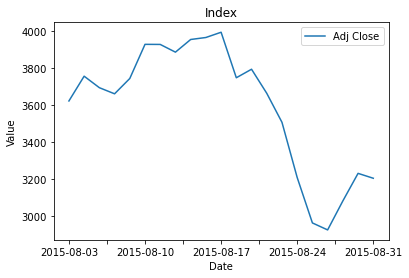

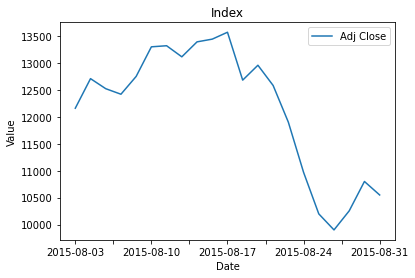

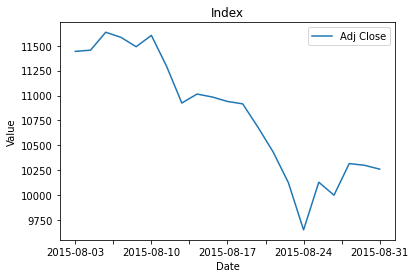

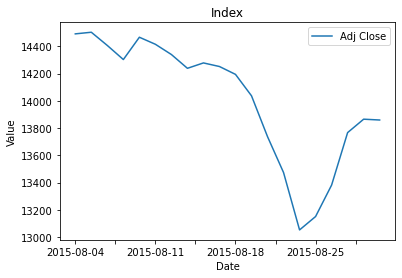

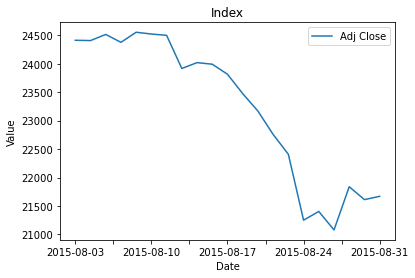

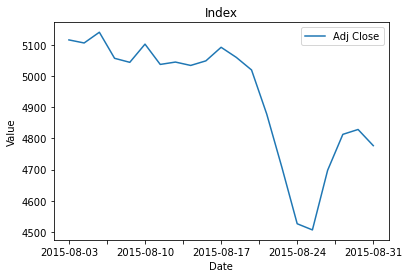

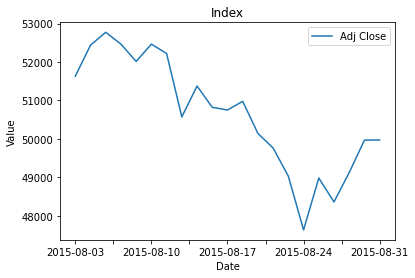

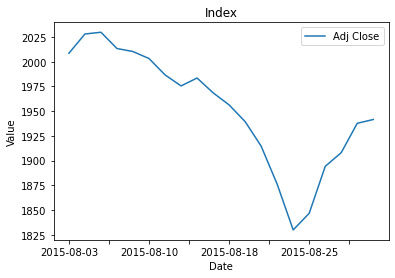

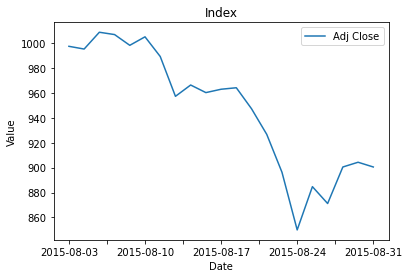

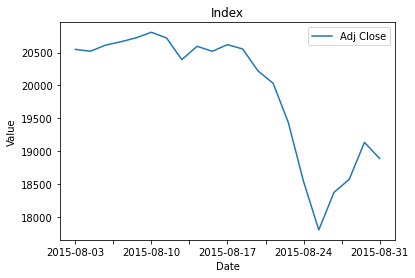

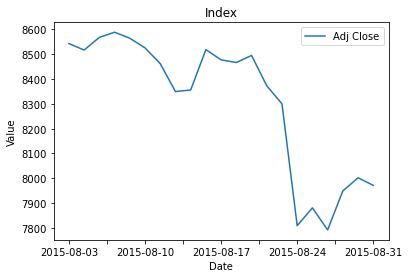

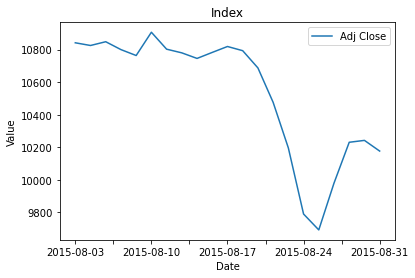

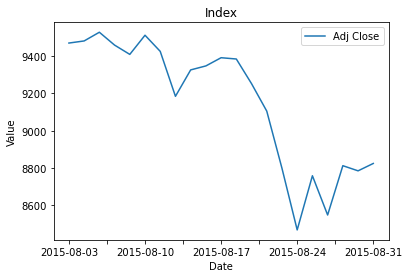

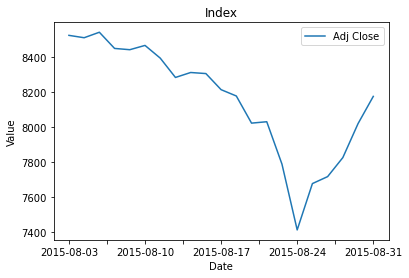

In [10]:
#H i)
date_adjClose = date[['Index', 'Date', 'Adj Close']]
date_adj = date_adjClose.groupby('Index')

date_adj.plot.line(x = 'Date', y = 'Adj Close', ylabel = 'Value', title = date_adj.keys)

<AxesSubplot:title={'center':'N100'}, xlabel='Date'>

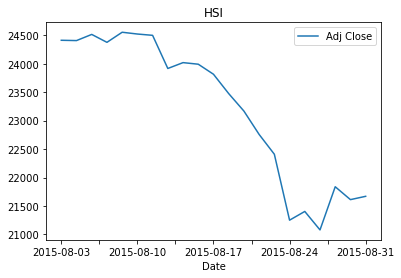

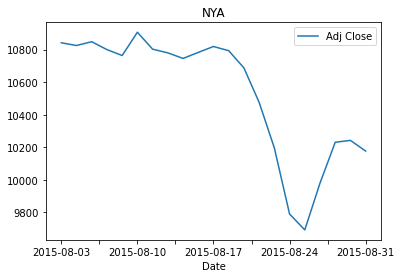

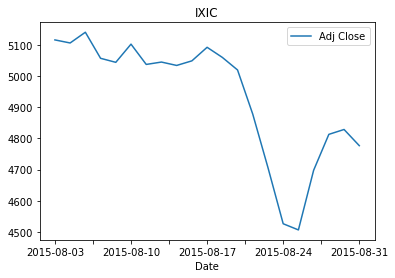

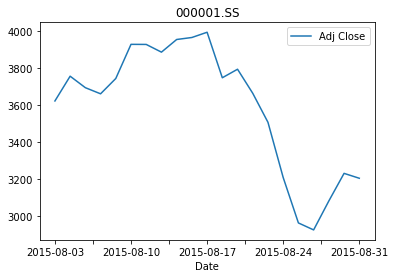

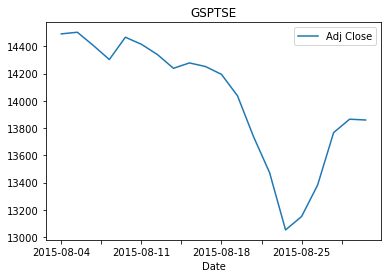

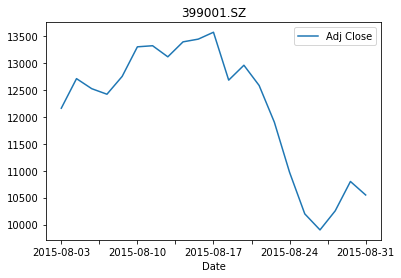

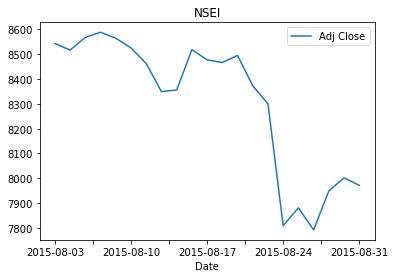

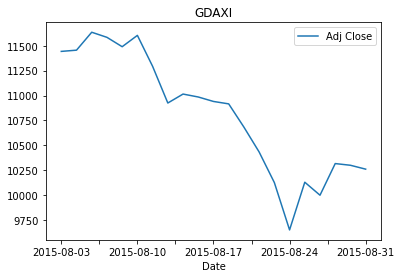

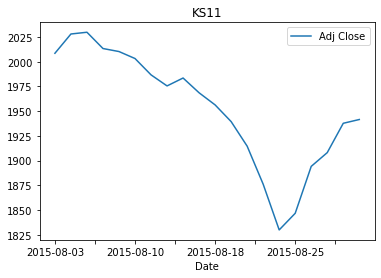

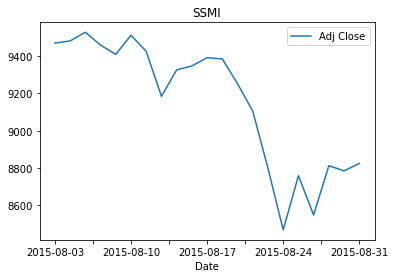

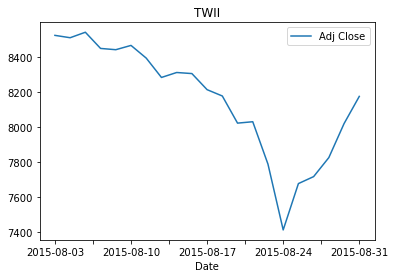

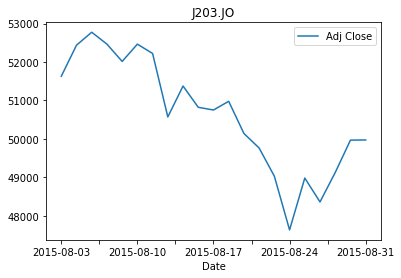

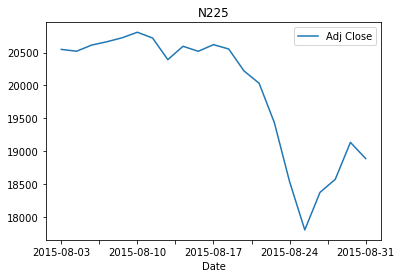

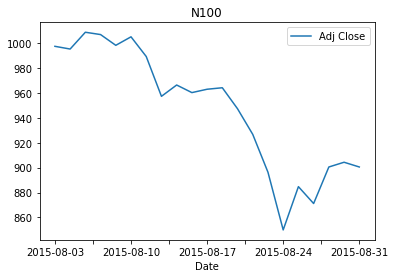

In [11]:
hsi = date[date['Index'] == 'HSI']
nya = date[date['Index'] == 'NYA']
ixic = date[date['Index'] == 'IXIC']
ss = date[date['Index'] == '000001.SS']
gsptse = date[date['Index'] == 'GSPTSE']
sz = date[date['Index'] == '399001.SZ']
nsei = date[date['Index'] == 'NSEI']
gdaxi = date[date['Index'] == 'GDAXI']
ks11 = date[date['Index'] == 'KS11']
ssmi = date[date['Index'] == 'SSMI']
twii = date[date['Index'] == 'TWII']
jo = date[date['Index'] == 'J203.JO']
n225 = date[date['Index'] == 'N225']
n100 = date[date['Index'] == 'N100']


hsi.plot.line(x = 'Date', y = 'Adj Close', title = 'HSI')
nya.plot.line(x = 'Date', y = 'Adj Close', title = 'NYA')
ixic.plot.line(x = 'Date', y = 'Adj Close', title = 'IXIC')
ss.plot.line(x = 'Date', y = 'Adj Close', title = '000001.SS')
gsptse.plot.line(x = 'Date', y = 'Adj Close', title = 'GSPTSE')
sz.plot.line(x = 'Date', y = 'Adj Close', title = '399001.SZ')
nsei.plot.line(x = 'Date', y = 'Adj Close', title = 'NSEI')
gdaxi.plot.line(x = 'Date', y = 'Adj Close', title = 'GDAXI')
ks11.plot.line(x = 'Date', y = 'Adj Close', title = 'KS11')
ssmi.plot.line(x = 'Date', y = 'Adj Close', title = 'SSMI')
twii.plot.line(x = 'Date', y = 'Adj Close', title = 'TWII')
jo.plot.line(x = 'Date', y = 'Adj Close', title = 'J203.JO')
n225.plot.line(x = 'Date', y = 'Adj Close', title = 'N225')
n100.plot.line(x = 'Date', y = 'Adj Close', title = 'N100')


hii)
Running a correlation test between each of the different tickers would help us determine if there is a relationship between any of them. For instance if two tickers have close to a 1 correlation that means that both stocks move up/down in tandem. If two tickers are close to -1 then one stock goes up while the other goes down. If the correlation is close to 0 then that means the tickers move independently of each other which is considered to be uncorrelated. 
By looking at our lines plot above you can get a visual example and determine whether a ticker is correlated with another. If the lines on differetn graphs seem to match up then they have a correlation.

hiii) New businesses being formed or buisnesses failing can affect the stocks of each day. A business failing could mean that another stock rises, while a business failing could mean a stock falling.

I) Since this data set goes back so many years we can see the growth of stocks over time. We can determine when the stock prices were at its highest and lowest from 1965-2021. We were also able to determine that back in 1965 there was only 2 tickers compared to the 14 tickers of 2021. So having such a large data set can show us the changes made the 65 year span.